<a href="https://colab.research.google.com/github/castrigno22/geopandas/blob/main/EsercitazioneGeopandas6_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 16.6 MB/s 
     |████████████████████████████████| 6.3 MB 51.2 MB/s 
     |████████████████████████████████| 15.4 MB 88 kB/s 


In [ ]:
!pip install  contextily

     |████████████████████████████████| 19.3 MB 90 kB/s 


In [ ]:
%matplotlib inline
import contextily
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
prov = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/ProvCM01012021_g")


In [ ]:
com = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g-20220120T125637Z-001/Limiti01012021_g/Com01012021_g")


In [ ]:
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon (1).zip")


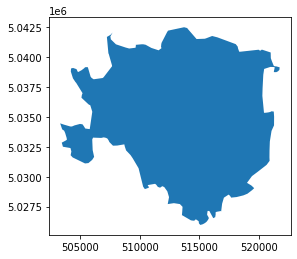

In [ ]:
milanoCOM = com[com['COMUNE'] == 'Milano']
milanoCOM.plot()

In [ ]:
parchiMil=parchi[parchi.intersects(milanoCOM.geometry.squeeze())]
parchiMil

FID  ...                                           geometry
20   21  ...  POLYGON ((516502.662 5041742.040, 516403.321 5...
21   22  ...  POLYGON ((533691.079 5042919.602, 533758.703 5...

[2 rows x 11 columns]

In [ ]:
comIntersects=com[com.intersects(parchiMil.unary_union)]
comIntersects

COD_RIP  ...                                           geometry
1811        1  ...  POLYGON ((493446.898 5029705.643, 493602.897 5...
1812        1  ...  POLYGON ((495595.883 5032525.624, 495661.881 5...
1815        1  ...  POLYGON ((496562.280 5041533.478, 496401.277 5...
1816        1  ...  POLYGON ((511386.603 5029333.275, 511518.968 5...
1817        1  ...  POLYGON ((499326.672 5038880.244, 499885.260 5...
...       ...  ...                                                ...
7465        1  ...  POLYGON ((534210.409 5035224.602, 534551.968 5...
7484        1  ...  POLYGON ((534698.954 5033625.792, 534731.476 5...
7486        1  ...  POLYGON ((530678.622 5027337.660, 530960.619 5...
7500        1  ...  POLYGON ((529834.629 5021137.707, 530206.624 5...
7506        1  ...  POLYGON ((534164.595 5029853.641, 534184.596 5...

[88 rows x 13 columns]

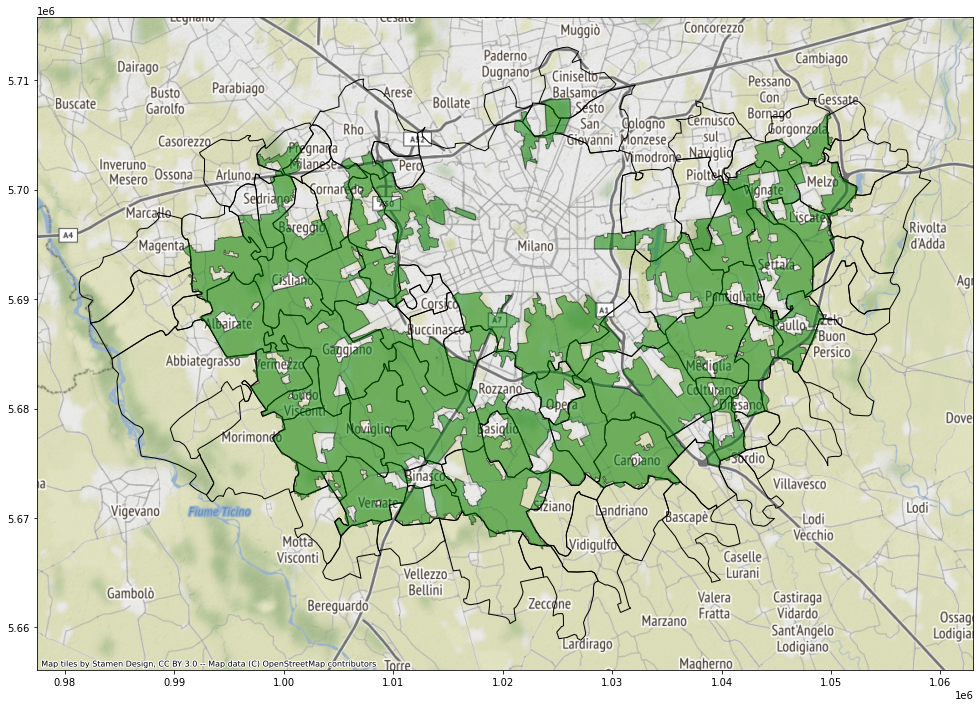

In [ ]:
ax= comIntersects.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="none",linewidth=1, edgecolor= "k")
parchiMil.to_crs(epsg= 3857).plot(ax=ax, facecolor = "green",alpha=0.5, edgecolor= "k")
contextily.add_basemap(ax)

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm")
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [ ]:
quartieriAt = quartieri[quartieri.intersects(parchiMil.to_crs(epsg=4326).unary_union)]
quartieriAt

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
9       61  ...  POLYGON ((9.11143 45.47640, 9.11193 45.47624, ...
10      60  ...  POLYGON ((9.13020 45.48464, 9.13075 45.48449, ...
11      62  ...  POLYGON ((9.08375 45.48485, 9.08444 45.48459, ...
20      83  ...  POLYGON ((9.17808 45.53479, 9.17807 45.53439, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
26      46  ...  POLYGON ((9.16112 45.42589, 9.16056 45.42605, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
30      14  ...  POLYGON ((9.21337 45.52948, 9.21337 45.52948, ...
31      32  ...  POLYGON ((9.26378 45.43251, 9.26384 45.43248, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
38      38  ...  POLYGON ((9.20060 45.43608, 9.20429 45.43642, ...
41      35  ...  POLYGON ((9.23480 45.44588, 9.23480 45.44569, ...
42      54  ...  POLYGON ((9.07736 45.45589, 9.07671 45.45364, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
47      65  ...  POLYGON ((9.09884 45.50652, 9.09884 45.50651, ...
50      41  ...  POLYGON ((9.17334 45.42346, 9.17402 45.42205, ...
52      56  ...  POLYGON ((9.12613 45.46928, 9.12638 45.46851, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...
59      42  ...  POLYGON ((9.18775 45.43732, 9.18941 45.43729, ...
61      36  ...  POLYGON ((9.21561 45.43849, 9.21685 45.43686, ...
65      55  ...  POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...
66      24  ...  POLYGON ((9.26017 45.47147, 9.26018 45.47143, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[29 rows x 9 columns]

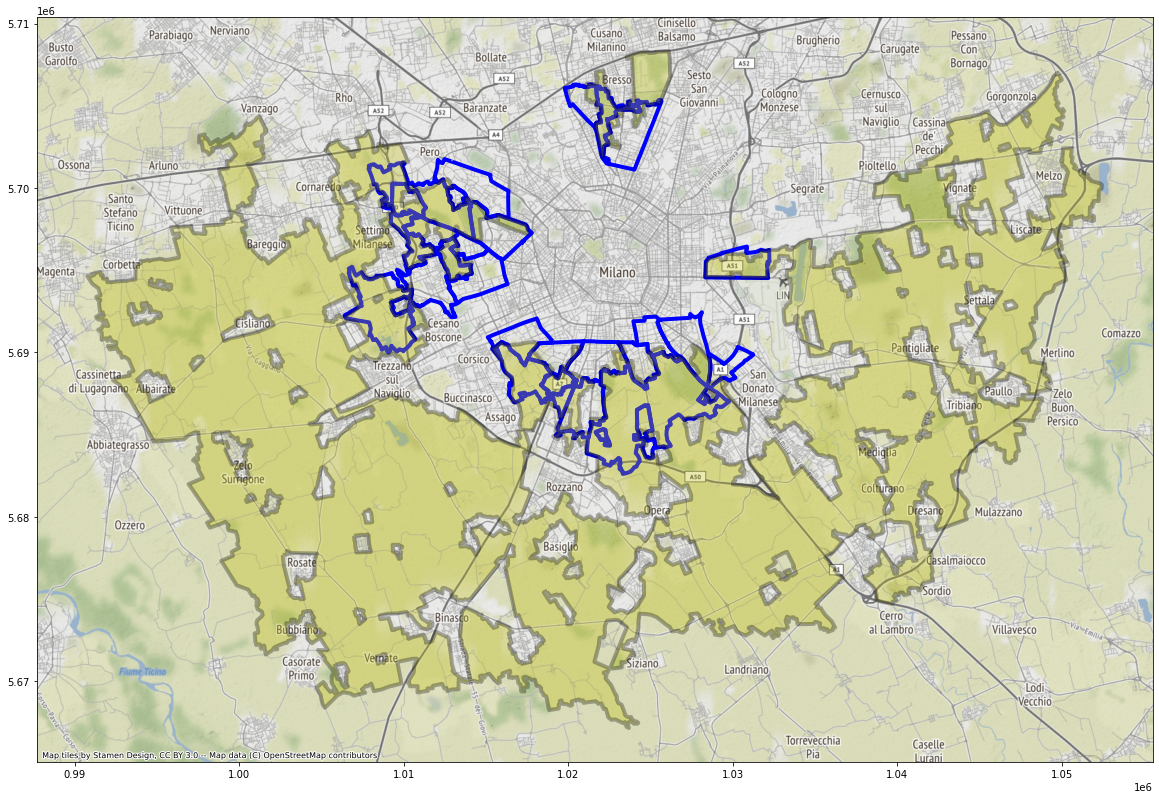

In [ ]:
ax = quartieriAt.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "none", edgecolor = "b", linewidth = 4)
parchiMil.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

Inserire il nome di un parco: Parco Nord Milano


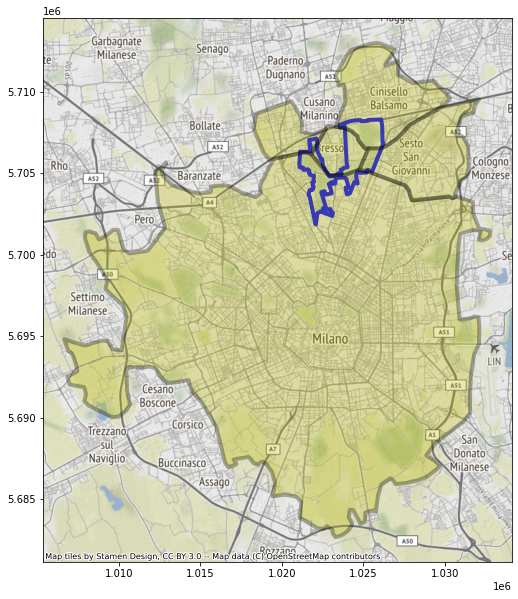

In [ ]:
nomeParco = input("Inserire il nome di un parco: ")
parco = parchi[parchi["NOME"] == nomeParco]
parcoSqueeze = parco.geometry.squeeze()
comParco =  com[com.intersects(parcoSqueeze)]
ax = parco.to_crs(epsg = 3857).plot(figsize=(10,10), facecolor = "none", edgecolor = "b", linewidth = 4)
comParco.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

Inserire il nome di un parco: Parco Nord Milano


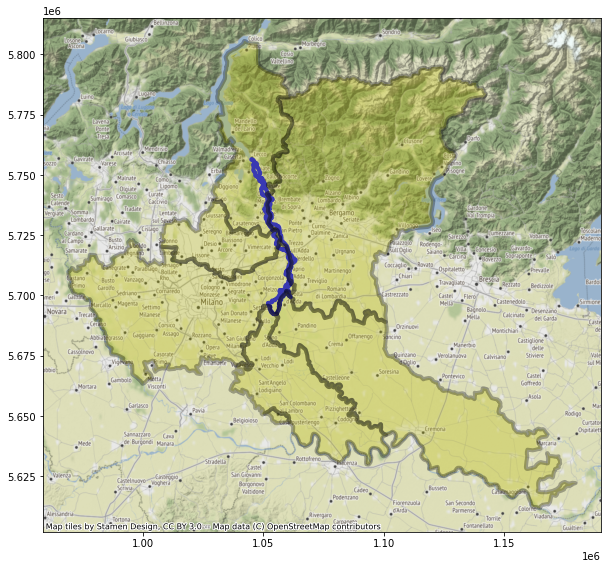

In [ ]:
nomeProvincia = input("Inserire il nome di un parco: ")
provincia = parchi[parchi["NOME"] == nomeProvincia]
parcoSqueeze = parco.geometry.squeeze()
provParco =  prov[prov.intersects(parcoSqueeze)]
ax = parco.to_crs(epsg = 3857).plot(figsize=(10,10), facecolor = "none", edgecolor = "b", linewidth = 4)
provParco.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

In [ ]:
prov

COD_RIP  ...                                           geometry
0          1  ...  POLYGON ((411015.006 5049970.983, 411266.039 5...
1          1  ...  POLYGON ((438328.612 5087208.215, 439028.888 5...
2          1  ...  POLYGON ((460929.542 5076320.298, 461165.259 5...
3          1  ...  MULTIPOLYGON (((378673.492 4958865.159, 378928...
4          1  ...  POLYGON ((425041.329 4997628.309, 424948.989 4...
..       ...  ...                                                ...
102        1  ...  POLYGON ((457749.464 5145501.795, 458662.395 5...
103        1  ...  POLYGON ((519754.706 5065242.380, 520199.702 5...
104        3  ...  POLYGON ((884760.019 4804406.440, 885511.011 4...
105        4  ...  POLYGON ((1081237.144 4611047.023, 1081399.393...
106        5  ...  MULTIPOLYGON (((448813.650 4301762.751, 448823...

[107 rows x 13 columns]